# TFM

## Tabla de contenidos

* [1. Objetivo](#cap1)
    * [1.1. Participantes](#section_1_1)
* [2. Librerías y carga de datos](#cap2)
* [3. Feature engineering](#cap3)
* [4. EDA](#cap4)
    * [4.1 EDA reddit](#section_4_1)
    * [4.2 EDA precio GME](#section_4_1)
* [5. Análisis sentimientos titulo](#cap5)
    * [Section 1.2](sSection_1_2)
        * [Section 1.2.1](#section_1_2_1)
        * [Section 1.2.2](#section_1_2_2)
        * [Section 1.2.3](#section_1_2_3)
* [6. Análisis sentimientos post](#cap6)
* [7. Conclusiones](#cap7)

## 1. Objetivo <a class="anchor" id="cap1"></a>

Este proyecto tiene como propósito que los estudiantes identifiquen un problema abierto en el área del análisis de datos apoyado por técnicas de Inteligencia Artificial en el ámbito de su preferencia (Educación, ambiente, criminología, gobierno, etc.). Una vez identificado el problema el estudiante aplicará los conocimientos y competencias, vistos y adquiridos en el Master para hacer un tratamiento de datos al nivel que escoja (Descriptivo, diagnóstico, predictivo, prescriptivo).

### 1.1. Participantes <a class="anchor" id="section_1_1"></a>

* Mireya Harillo Gámez
* Óscar Tienda Beteta
* Henry Ocaña Luna
* David de la Torre Amengual

## 2. Librerías y carga de datos <a class="anchor" id="cap2"></a>

In [64]:
import sys

!$sys.executable -m pip install requests

!$sys.executable -m pip install bs4

  Created wheel for bs4: filename=bs4-0.0.1-cp37-none-any.whl size=1278 sha256=fd494804adddc1eae6a1fd87bc1d16b5ed8a8dcb94bb871927ecb9cf14be02a8
  Stored in directory: C:\Users\david\AppData\Local\pip\Cache\wheels\a0\b0\b2\4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4


In [68]:
import pandas as pd # Tratamiento de datos en formato tabular
import matplotlib.pyplot as plt #Visualizaciones
%matplotlib inline
import seaborn as sns # Visualizaciónes
import IPython # Leer imágenes desde URL
import requests #Web Scraping
from bs4 import BeautifulSoup #Web Scraping

A continuación cargamos los datos de reddit con los que vamos a trabajar y mostramos una porción.

In [2]:
reddit_raw_dataset = pd.read_csv('https://raw.githubusercontent.com/david-dlta/recursosTFM/main/reddit_wsb.csv')
reddit_raw_dataset.head()

title  score      id  \
0  It's not about the money, it's about sending a...     55  l6ulcx   
1  Math Professor Scott Steiner says the numbers ...    110  l6uibd   
2                                    Exit the system      0  l6uhhn   
3  NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...     29  l6ugk6   
4  Not to distract from GME, just thought our AMC...     71  l6ufgy   

                                                 url  comms_num       created  \
0                    https://v.redd.it/6j75regs72e61          6  1.611863e+09   
1                    https://v.redd.it/ah50lyny62e61         23  1.611862e+09   
2  https://www.reddit.com/r/wallstreetbets/commen...         47  1.611862e+09   
3  https://sec.report/Document/0001193125-21-019848/         74  1.611862e+09   
4                https://i.redd.it/4h2sukb662e61.jpg        156  1.611862e+09   

                                                body            timestamp  
0                                                NaN  2021-01-28 21:37:41  
1                                                NaN  2021-01-28 21:32:10  
2  The CEO of NASDAQ pushed to halt trading “to g...  2021-01-28 21:30:35  
3                                                NaN  2021-01-28 21:28:57  
4                                                NaN  2021-01-28 21:26:56

Hacemos lo mismo con los datos de los precios de las acciones de GameStop Corp. (GME).

In [3]:
gme_raw_dataset = pd.read_csv('https://raw.githubusercontent.com/david-dlta/recursosTFM/main/GME_stock.csv')
gme_raw_dataset.head()

date  open_price  high_price   low_price  close_price       volume  \
0  2021-01-28  265.000000  483.000000  112.250000   193.600006   58815800.0   
1  2021-01-27  354.829987  380.000000  249.000000   347.510010   93396700.0   
2  2021-01-26   88.559998  150.000000   80.199997   147.979996  178588000.0   
3  2021-01-25   96.730003  159.179993   61.130001    76.790001  177874000.0   
4  2021-01-22   42.590000   76.760002   42.320000    65.010002  196784300.0   

   adjclose_price  
0      193.600006  
1      347.510010  
2      147.979996  
3       76.790001  
4       65.010002

Por otra parte vamos a utilizar datos de los precios de las acciones de GameStop Corp. (GME). No hemos encontrado ningun dataset ya creado con estos datos por lo que vamos a tener que conseguir los datos por nuestra cuenta. Para ello vamos a crear una función que realice el scraping de los datos. 

La cotización de las acciones con el ticker GME, juntoa otras, se pueden encontrar en el sitio web *https://www.nasdaq.com/*, bolsa en la que cotiza esta compañia. 

In [ ]:
url = ''
page = 
soup = 

def webScraper():
    

## 3. Feature engineering <a class="anchor" id="cap3"></a>

Los datos con los que contamos de partida en el dataset no se ajustan totalmente a las nuestras necesidades. Por ello debemos realizar algunas transformaciones sobre estos para poder llevar a cabo el proyecto.

Creamos tres atributos nuevos partiendo del atributo *timestamp*.

In [4]:
reddit_dataset = reddit_raw_dataset.copy()

reddit_dataset['date'] = pd.to_datetime(reddit_raw_dataset['timestamp']).dt.date
reddit_dataset['year'] = pd.to_datetime(reddit_raw_dataset['timestamp']).dt.year
reddit_dataset['month'] = pd.to_datetime(reddit_raw_dataset['timestamp']).dt.month
reddit_dataset['day'] = pd.to_datetime(reddit_raw_dataset['timestamp']).dt.day
reddit_dataset['timestamp'] = reddit_dataset.rename(columns={'timestamp': 'date'})
#reddit_dataset.rename(columns={"timestamp": "date"})

reddit_dataset

title  score      id  \
0      It's not about the money, it's about sending a...     55  l6ulcx   
1      Math Professor Scott Steiner says the numbers ...    110  l6uibd   
2                                        Exit the system      0  l6uhhn   
3      NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...     29  l6ugk6   
4      Not to distract from GME, just thought our AMC...     71  l6ufgy   
...                                                  ...    ...     ...   
52106  Everything I've learned about being on Wall St...   1011  od9xfn   
52107  I Accidentally YOLOed Half My Portfolio After ...    510  od97ek   
52108                      $53k TO $306K in just 2 days.   1190  od7008   
52109       Average Annual Return on Investments for WSB     74  od77kx   
52110  Genuine question about hypothetical stock shor...     19  od75w3   

                                                     url  comms_num  \
0                        https://v.redd.it/6j75regs72e61          6   
1                        https://v.redd.it/ah50lyny62e61         23   
2      https://www.reddit.com/r/wallstreetbets/commen...         47   
3      https://sec.report/Document/0001193125-21-019848/         74   
4                    https://i.redd.it/4h2sukb662e61.jpg        156   
...                                                  ...        ...   
52106                    https://v.redd.it/dfkjjyjae3971         87   
52107  https://www.reddit.com/r/wallstreetbets/commen...        288   
52108                https://i.redd.it/k0pkc2m4i2971.png        237   
52109  https://www.reddit.com/r/wallstreetbets/commen...        194   
52110  https://www.reddit.com/r/wallstreetbets/commen...         64   

            created                                               body  \
0      1.611863e+09                                                NaN   
1      1.611862e+09                                                NaN   
2      1.611862e+09  The CEO of NASDAQ pushed to halt trading “to g...   
3      1.611862e+09                                                NaN   
4      1.611862e+09                                                NaN   
...             ...                                                ...   
52106  1.625359e+09                                                NaN   
52107  1.625357e+09  tl;dr at bottom\n\nSo after using DD from [u/C...   
52108  1.625349e+09                                                NaN   
52109  1.625349e+09  I was having a discussion with my friends abou...   
52110  1.625349e+09  So I want to start this off by saying you prob...   

                                               timestamp        date  year  \
0      It's not about the money, it's about sending a...  2021-01-28  2021   
1      Math Professor Scott Steiner says the numbers ...  2021-01-28  2021   
2                                        Exit the system  2021-01-28  2021   
3      NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...  2021-01-28  2021   
4      Not to distract from GME, just thought our AMC...  2021-01-28  2021   
...                                                  ...         ...   ...   
52106  Everything I've learned about being on Wall St...  2021-07-04  2021   
52107  I Accidentally YOLOed Half My Portfolio After ...  2021-07-04  2021   
52108                      $53k TO $306K in just 2 days.  2021-07-04  2021   
52109       Average Annual Return on Investments for WSB  2021-07-04  2021   
52110  Genuine question about hypothetical stock shor...  2021-07-04  2021   

       month  day  
0          1   28  
1          1   28  
2          1   28  
3          1   28  
4          1   28  
...      ...  ...  
52106      7    4  
52107      7    4  
52108      7    4  
52109      7    4  
52110      7    4  

[52111 rows x 12 columns]

In [5]:
gme_dataset = gme_raw_dataset.copy()

gme_raw_dataset['date'] = pd.to_datetime(gme_raw_dataset['date'])

gme_dataset['week_day'] = gme_raw_dataset['date'].dt.day_name()

gme_dataset

date  open_price  high_price   low_price  close_price  \
0     2021-01-28  265.000000  483.000000  112.250000   193.600006   
1     2021-01-27  354.829987  380.000000  249.000000   347.510010   
2     2021-01-26   88.559998  150.000000   80.199997   147.979996   
3     2021-01-25   96.730003  159.179993   61.130001    76.790001   
4     2021-01-22   42.590000   76.760002   42.320000    65.010002   
...          ...         ...         ...         ...          ...   
4768  2002-02-20    9.600000    9.875000    9.525000     9.875000   
4769  2002-02-19    9.900000    9.900000    9.375000     9.550000   
4770  2002-02-15   10.000000   10.025000    9.850000     9.950000   
4771  2002-02-14   10.175000   10.195000    9.925000    10.000000   
4772  2002-02-13    9.625000   10.060000    9.525000    10.050000   

           volume  adjclose_price   week_day  
0      58815800.0      193.600006   Thursday  
1      93396700.0      347.510010  Wednesday  
2     178588000.0      147.979996    Tuesday  
3     177874000.0       76.790001     Monday  
4     196784300.0       65.010002     Friday  
...           ...             ...        ...  
4768    1723200.0        6.648838  Wednesday  
4769    1852600.0        6.430017    Tuesday  
4770    2097400.0        6.699336     Friday  
4771    2755400.0        6.733003   Thursday  
4772   19054000.0        6.766666  Wednesday  

[4773 rows x 8 columns]

## 4. EDA <a class="anchor" id="cap4"></a>

### 4.1. EDA reddit <a class="anchor" id="section_4_1"></a>


In [6]:
reddit_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52111 entries, 0 to 52110
Data columns (total 12 columns):
title        52111 non-null object
score        52111 non-null int64
id           52111 non-null object
url          52111 non-null object
comms_num    52111 non-null int64
created      52111 non-null float64
body         24236 non-null object
timestamp    52111 non-null object
date         52111 non-null object
year         52111 non-null int64
month        52111 non-null int64
day          52111 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 4.8+ MB


Comprobamos de forma visual el número de registros nulos de los atributos del dataset.

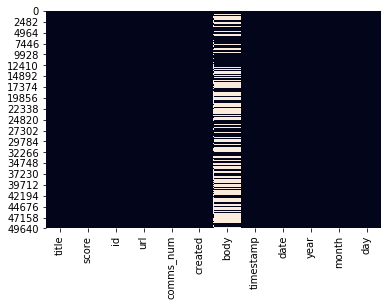

In [7]:
sns.heatmap(reddit_dataset.isnull(), cbar=False)
plt.show()

Podemos observar que la columna *body* tiene un gran número de registros nulos. Vamos a centrarnos en esta varaible apra identificar que esta sucediendo.

In [8]:
reddit_dataset[reddit_dataset['body'].isna()]

title  score      id  \
0      It's not about the money, it's about sending a...     55  l6ulcx   
1      Math Professor Scott Steiner says the numbers ...    110  l6uibd   
3      NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...     29  l6ugk6   
4      Not to distract from GME, just thought our AMC...     71  l6ufgy   
5                                    WE BREAKING THROUGH    405  l6uf7d   
...                                                  ...    ...     ...   
52102                                          Pro moves  22537  ode6ey   
52103  Root Inc. (ROOT) Just Entered My Buy Zone. Int...     83  odcvds   
52104          $3.2k -> $37.8k in 1 day on SPCE $45c FDs   1341  odc0nu   
52106  Everything I've learned about being on Wall St...   1011  od9xfn   
52108                      $53k TO $306K in just 2 days.   1190  od7008   

                                                     url  comms_num  \
0                        https://v.redd.it/6j75regs72e61          6   
1                        https://v.redd.it/ah50lyny62e61         23   
3      https://sec.report/Document/0001193125-21-019848/         74   
4                    https://i.redd.it/4h2sukb662e61.jpg        156   
5                    https://i.redd.it/2wef8tc062e61.png         84   
...                                                  ...        ...   
52102                https://i.redd.it/c39slsudv4971.jpg        352   
52103                https://i.redd.it/ufse5osed4971.png        130   
52104                https://i.redd.it/yij40o9u34971.png        305   
52106                    https://v.redd.it/dfkjjyjae3971         87   
52108                https://i.redd.it/k0pkc2m4i2971.png        237   

            created body                                          timestamp  \
0      1.611863e+09  NaN  It's not about the money, it's about sending a...   
1      1.611862e+09  NaN  Math Professor Scott Steiner says the numbers ...   
3      1.611862e+09  NaN  NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...   
4      1.611862e+09  NaN  Not to distract from GME, just thought our AMC...   
5      1.611862e+09  NaN                                WE BREAKING THROUGH   
...             ...  ...                                                ...   
52102  1.625377e+09  NaN                                          Pro moves   
52103  1.625371e+09  NaN  Root Inc. (ROOT) Just Entered My Buy Zone. Int...   
52104  1.625368e+09  NaN          $3.2k -> $37.8k in 1 day on SPCE $45c FDs   
52106  1.625359e+09  NaN  Everything I've learned about being on Wall St...   
52108  1.625349e+09  NaN                      $53k TO $306K in just 2 days.   

             date  year  month  day  
0      2021-01-28  2021      1   28  
1      2021-01-28  2021      1   28  
3      2021-01-28  2021      1   28  
4      2021-01-28  2021      1   28  
5      2021-01-28  2021      1   28  
...           ...   ...    ...  ...  
52102  2021-07-04  2021      7    4  
52103  2021-07-04  2021      7    4  
52104  2021-07-04  2021      7    4  
52106  2021-07-04  2021      7    4  
52108  2021-07-04  2021      7    4  

[27875 rows x 12 columns]

Seleccionamos una de las URL para ver si nos da más información.

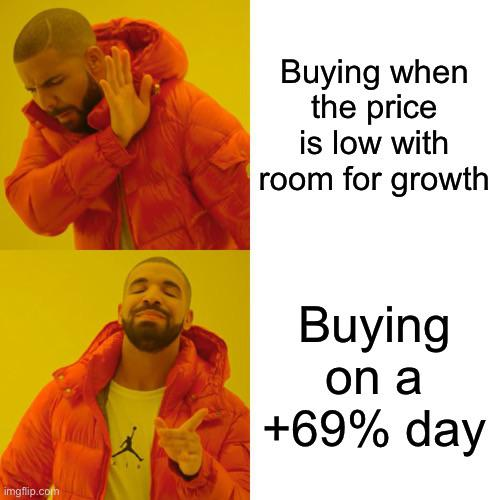

In [9]:
IPython.display.Image('https://i.redd.it/c39slsudv4971.jpg', width = 250)

A parte de imágenes, las URL de los registros que tienen la variable *body* nula, contienen videos, documentos y otros archivos multimedia. Esa es la razón por la que el cuerpo del post es nulo. Cuando realicemos el análisis sentimental del cuerpo del post deberemos eliminar estos registros. Pero no los descartaremos cuando analicemos el sentimiento de los titulos de los posts.

A continuación vamos a extraer información descriptiva de los datos. Con el parámetro *include = 'all'* especificamos que queremos información de todos los atributos del dataset, incluso si no son numéricos.

In [10]:
reddit_dataset.describe(include='all')

title          score      id  \
count   52111   52111.000000   52111   
unique  50983            NaN   52111   
top       AMC            NaN  lysffd   
freq       40            NaN       1   
mean      NaN    1392.054825     NaN   
std       NaN    8065.440508     NaN   
min       NaN       0.000000     NaN   
25%       NaN       1.000000     NaN   
50%       NaN      36.000000     NaN   
75%       NaN     205.000000     NaN   
max       NaN  348241.000000     NaN   

                                                   url     comms_num  \
count                                            52111  52111.000000   
unique                                           52096           NaN   
top     https://magic.freetrade.io/join/jamie/13edb513           NaN   
freq                                                11           NaN   
mean                                               NaN    258.724550   
std                                                NaN   2540.474545   
min                                                NaN      0.000000   
25%                                                NaN      3.000000   
50%                                                NaN     17.000000   
75%                                                NaN     58.000000   
max                                                NaN  93268.000000   

             created                                               body  \
count   5.211100e+04                                              24236   
unique           NaN                                              23702   
top              NaN  Your daily trading discussion thread. Please k...   
freq             NaN                                                 74   
mean    1.614303e+09                                                NaN   
std     3.733101e+06                                                NaN   
min     1.601340e+09                                                NaN   
25%     1.611882e+09                                                NaN   
50%     1.612479e+09                                                NaN   
75%     1.615066e+09                                                NaN   
max     1.626408e+09                                                NaN   

       timestamp        date          year         month           day  
count      52111       52111  52111.000000  52111.000000  52111.000000  
unique     50983         158           NaN           NaN           NaN  
top          AMC  2021-01-29           NaN           NaN           NaN  
freq          40       15694           NaN           NaN           NaN  
mean         NaN         NaN   2020.999981      2.296866     17.674694  
std          NaN         NaN      0.004381      1.534253     11.042699  
min          NaN         NaN   2020.000000      1.000000      1.000000  
25%          NaN         NaN   2021.000000      1.000000      6.000000  
50%          NaN         NaN   2021.000000      2.000000     19.000000  
75%          NaN         NaN   2021.000000      3.000000     29.000000  
max          NaN         NaN   2021.000000      9.000000     31.000000

**Observaciones**

In [11]:
reddit_dataset.head()

title  score      id  \
0  It's not about the money, it's about sending a...     55  l6ulcx   
1  Math Professor Scott Steiner says the numbers ...    110  l6uibd   
2                                    Exit the system      0  l6uhhn   
3  NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...     29  l6ugk6   
4  Not to distract from GME, just thought our AMC...     71  l6ufgy   

                                                 url  comms_num       created  \
0                    https://v.redd.it/6j75regs72e61          6  1.611863e+09   
1                    https://v.redd.it/ah50lyny62e61         23  1.611862e+09   
2  https://www.reddit.com/r/wallstreetbets/commen...         47  1.611862e+09   
3  https://sec.report/Document/0001193125-21-019848/         74  1.611862e+09   
4                https://i.redd.it/4h2sukb662e61.jpg        156  1.611862e+09   

                                                body  \
0                                                NaN   
1                                                NaN   
2  The CEO of NASDAQ pushed to halt trading “to g...   
3                                                NaN   
4                                                NaN   

                                           timestamp        date  year  month  \
0  It's not about the money, it's about sending a...  2021-01-28  2021      1   
1  Math Professor Scott Steiner says the numbers ...  2021-01-28  2021      1   
2                                    Exit the system  2021-01-28  2021      1   
3  NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...  2021-01-28  2021      1   
4  Not to distract from GME, just thought our AMC...  2021-01-28  2021      1   

   day  
0   28  
1   28  
2   28  
3   28  
4   28

Vamos a explorar cual es la cantidad de posts que se han realizado en función de la fecha.

In [12]:
posts_fecha = reddit_dataset.groupby(['date']).size().reset_index(name='counts')

C:\Users\david\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


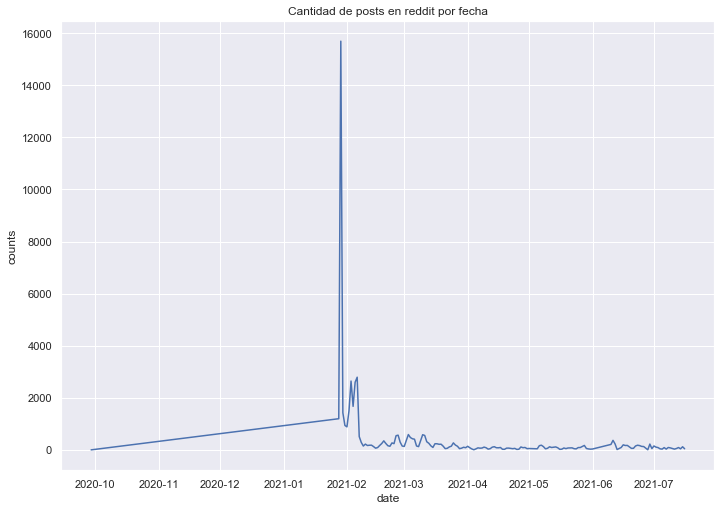

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.lineplot(data=posts_fecha, x='date', y='counts').set_title('Cantidad de posts en reddit por fecha')

plt.show()

Vamos a explorar la puntuación media recibida en los posts en función de la fecha.

In [14]:
#score_fecha = reddit_dataset.groupby(['date']).size().reset_index(name='counts')

score_fecha = reddit_dataset[['score','date']].groupby(['date']).mean().reset_index()

score_fecha

date        score
0    2020-09-29     4.000000
1    2021-01-28   960.609023
2    2021-01-29   408.457309
3    2021-01-30  4618.594101
4    2021-01-31  5230.513312
..          ...          ...
153  2021-07-12   713.754717
154  2021-07-13   779.956044
155  2021-07-14  1263.268293
156  2021-07-15   725.500000
157  2021-07-16    65.162791

[158 rows x 2 columns]

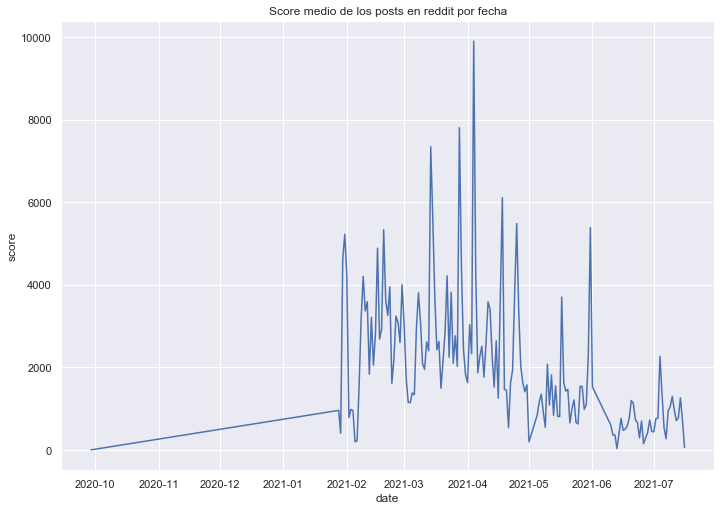

In [15]:
sns.lineplot(data=score_fecha, x='date', y='score').set_title('Score medio de los posts en reddit por fecha')

plt.show()

Vamos a explorar si la longitud del titulo o del cuerpo de los posts tienen relación con la puntuación de estos.

In [16]:
reddit_dataset.head(3)

title  score      id  \
0  It's not about the money, it's about sending a...     55  l6ulcx   
1  Math Professor Scott Steiner says the numbers ...    110  l6uibd   
2                                    Exit the system      0  l6uhhn   

                                                 url  comms_num       created  \
0                    https://v.redd.it/6j75regs72e61          6  1.611863e+09   
1                    https://v.redd.it/ah50lyny62e61         23  1.611862e+09   
2  https://www.reddit.com/r/wallstreetbets/commen...         47  1.611862e+09   

                                                body  \
0                                                NaN   
1                                                NaN   
2  The CEO of NASDAQ pushed to halt trading “to g...   

                                           timestamp        date  year  month  \
0  It's not about the money, it's about sending a...  2021-01-28  2021      1   
1  Math Professor Scott Steiner says the numbers ...  2021-01-28  2021      1   
2                                    Exit the system  2021-01-28  2021      1   

   day  
0   28  
1   28  
2   28

In [30]:
score_length=pd.DataFrame()
score_length['score'] = reddit_dataset['score']
score_length['title_len'] = pd.DataFrame(reddit_dataset['title'].str.len())

score_length['body_len'] = pd.DataFrame(reddit_dataset['body'].str.len())
score_length['comms_num'] = reddit_dataset['comms_num']

score_length

score  title_len  body_len  comms_num
0         55         59       NaN          6
1        110         80       NaN         23
2          0         15    1319.0         47
3         29         75       NaN         74
4         71         79       NaN        156
...      ...        ...       ...        ...
52106   1011         59       NaN         87
52107    510         54    2169.0        288
52108   1190         29       NaN        237
52109     74         44     994.0        194
52110     19         60    1010.0         64

[52111 rows x 4 columns]

Reemplazamos los registros con valor *nan* en la columna *body_len* por 0.

In [31]:
score_length.fillna(0)

score  title_len  body_len  comms_num
0         55         59       0.0          6
1        110         80       0.0         23
2          0         15    1319.0         47
3         29         75       0.0         74
4         71         79       0.0        156
...      ...        ...       ...        ...
52106   1011         59       0.0         87
52107    510         54    2169.0        288
52108   1190         29       0.0        237
52109     74         44     994.0        194
52110     19         60    1010.0         64

[52111 rows x 4 columns]

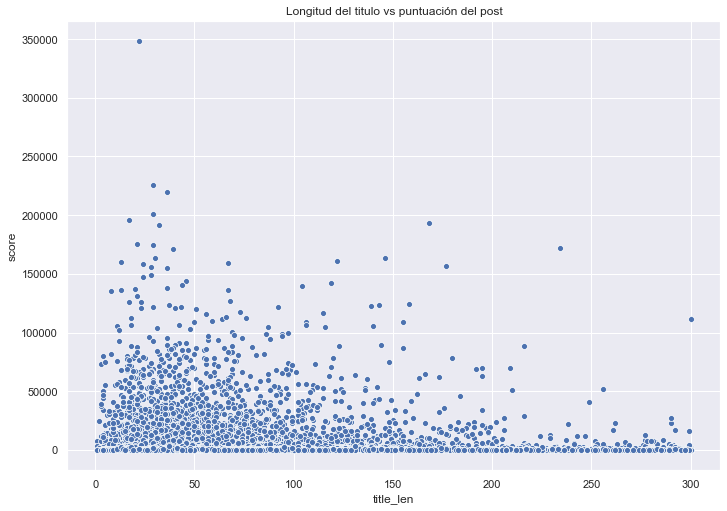

In [45]:
sns.scatterplot(data=score_length, x='title_len', y='score').set_title('Longitud del titulo vs puntuación del post')

plt.show()

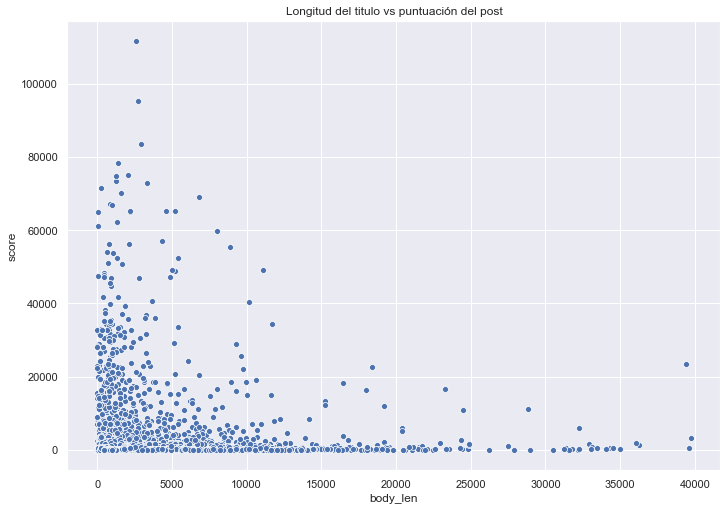

In [41]:
sns.scatterplot(data=score_length, x='body_len', y='score').set_title('Longitud del titulo vs puntuación del post')

plt.show()

Con el mismo dataset que hemos generado vamos a explorar si la puntuación del post tiene relación con el número de comentarios. 

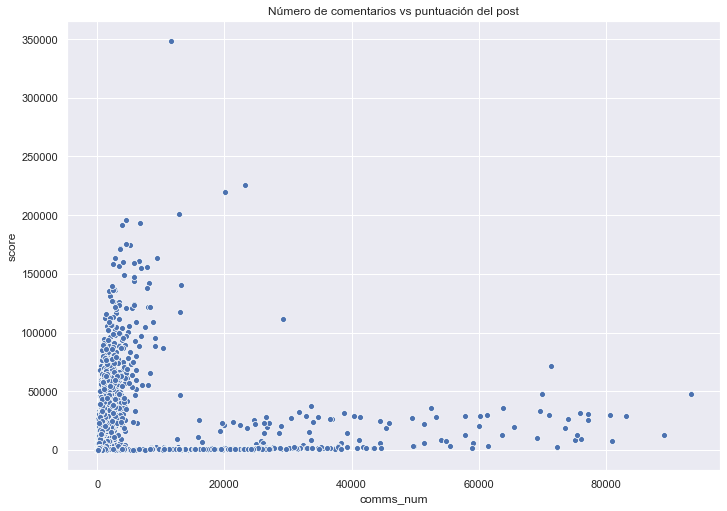

In [36]:
sns.scatterplot(data=score_length, x='comms_num', y='score').set_title('Número de comentarios vs puntuación del post')

plt.show()

### 4.2. EDA precio GME <a class="anchor" id="section_4_2"></a>

In [37]:
gme_dataset.head(5)

date  open_price  high_price   low_price  close_price       volume  \
0  2021-01-28  265.000000  483.000000  112.250000   193.600006   58815800.0   
1  2021-01-27  354.829987  380.000000  249.000000   347.510010   93396700.0   
2  2021-01-26   88.559998  150.000000   80.199997   147.979996  178588000.0   
3  2021-01-25   96.730003  159.179993   61.130001    76.790001  177874000.0   
4  2021-01-22   42.590000   76.760002   42.320000    65.010002  196784300.0   

   adjclose_price   week_day  
0      193.600006   Thursday  
1      347.510010  Wednesday  
2      147.979996    Tuesday  
3       76.790001     Monday  
4       65.010002     Friday

In [38]:
gme_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 8 columns):
date              4773 non-null object
open_price        4773 non-null float64
high_price        4773 non-null float64
low_price         4773 non-null float64
close_price       4773 non-null float64
volume            4773 non-null float64
adjclose_price    4773 non-null float64
week_day          4773 non-null object
dtypes: float64(6), object(2)
memory usage: 298.4+ KB


Vamos a convertir el tipo de datos de la columna *date* a tipo *datetime*, esto nos facilitará tratar con este campo posteriormente.

In [51]:
gme_dataset['date'] = pd.to_datetime(gme_dataset['date'], format='%Y-%m-%d')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4773 entries, 0 to 4772
Data columns (total 8 columns):
date              4773 non-null datetime64[ns]
open_price        4773 non-null float64
high_price        4773 non-null float64
low_price         4773 non-null float64
close_price       4773 non-null float64
volume            4773 non-null float64
adjclose_price    4773 non-null float64
week_day          4773 non-null object
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 298.4+ KB


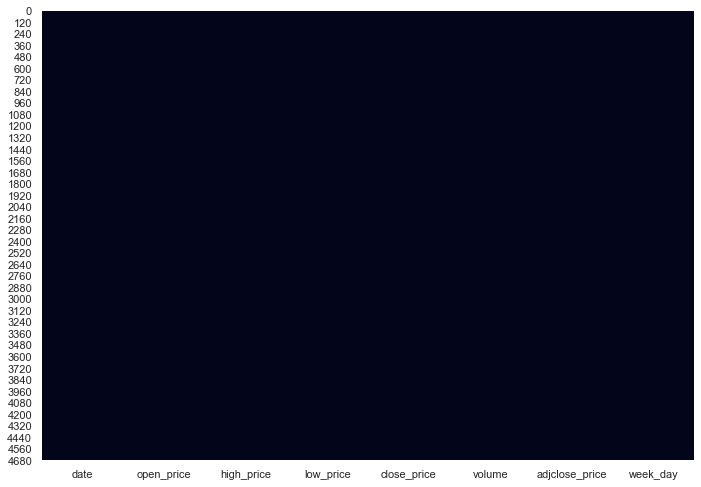

In [52]:
sns.heatmap(gme_dataset.isnull(), cbar=False)
plt.show()

Podemos observar que el dataset no contiene valores nulos.

Vamos a detallar más la información de cada una de las variables para hacernos una mejor idea de estas.

In [54]:
gme_dataset.describe(include='all')

date   open_price   high_price    low_price  \
count                  4773  4773.000000  4773.000000  4773.000000   
unique                 4773          NaN          NaN          NaN   
top     2006-07-20 00:00:00          NaN          NaN          NaN   
freq                      1          NaN          NaN          NaN   
first   2002-02-13 00:00:00          NaN          NaN          NaN   
last    2021-01-28 00:00:00          NaN          NaN          NaN   
mean                    NaN    23.201005    23.693590    22.714309   
std                     NaN    14.695884    16.210219    13.628194   
min                     NaN     2.850000     2.940000     2.570000   
25%                     NaN    11.360000    11.575000    11.130000   
50%                     NaN    21.760000    22.110001    21.430000   
75%                     NaN    29.420000    30.170000    28.719999   
max                     NaN   354.829987   483.000000   249.000000   

        close_price        volume  adjclose_price   week_day  
count   4773.000000  4.773000e+03     4773.000000       4773  
unique          NaN           NaN             NaN          5  
top             NaN           NaN             NaN  Wednesday  
freq            NaN           NaN             NaN        980  
first           NaN           NaN             NaN        NaN  
last            NaN           NaN             NaN        NaN  
mean      23.193234  3.398255e+06       16.882897        NaN  
std       14.513893  6.547035e+06       11.019953        NaN  
min        2.800000  6.500000e+04        2.555174        NaN  
25%       11.350000  1.528900e+06        9.607993        NaN  
50%       21.760000  2.491800e+06       15.479172        NaN  
75%       29.430000  3.791600e+06       22.205433        NaN  
max      347.510010  1.967843e+08      347.510010        NaN

Lo que más nos salta a la vista es que contamos con datos desde 2002, lo cual no nos es de utilidad para el análisis que queremos desarrollar. Vamos a reducir el tamaño para únicamente mantener los datos de 2021.

In [56]:
gme_dataset_2021 = gme_dataset[gme_dataset['date']>= pd.to_datetime('2021-01-01', format='%Y-%m-%d')]
gme_dataset_2021

date  open_price  high_price   low_price  close_price       volume  \
0  2021-01-28  265.000000  483.000000  112.250000   193.600006   58815800.0   
1  2021-01-27  354.829987  380.000000  249.000000   347.510010   93396700.0   
2  2021-01-26   88.559998  150.000000   80.199997   147.979996  178588000.0   
3  2021-01-25   96.730003  159.179993   61.130001    76.790001  177874000.0   
4  2021-01-22   42.590000   76.760002   42.320000    65.010002  196784300.0   
5  2021-01-21   39.230000   44.750000   37.000000    43.029999   57079800.0   
6  2021-01-20   37.369999   41.189999   36.060001    39.119999   33471800.0   
7  2021-01-19   41.549999   45.520000   36.639999    39.360001   74721900.0   
8  2021-01-15   38.490002   40.750000   34.009998    35.500000   46752200.0   
9  2021-01-14   38.090000   43.060001   33.049999    39.910000   93717400.0   
10 2021-01-13   20.420000   38.650002   20.030001    31.400000  144501700.0   
11 2021-01-12   19.959999   20.400000   19.320000    19.950001    7060700.0   
12 2021-01-11   19.410000   20.650000   19.010000    19.940001   14927600.0   
13 2021-01-08   18.180000   18.299999   17.080000    17.690001    6464500.0   
14 2021-01-07   18.469999   19.450001   18.020000    18.080000    6129300.0   
15 2021-01-06   17.340000   18.980000   17.330000    18.360001    6056200.0   
16 2021-01-05   17.350000   18.080000   17.230000    17.370001    4961500.0   
17 2021-01-04   19.000000   19.100000   17.150000    17.250000   10022500.0   

    adjclose_price   week_day  
0       193.600006   Thursday  
1       347.510010  Wednesday  
2       147.979996    Tuesday  
3        76.790001     Monday  
4        65.010002     Friday  
5        43.029999   Thursday  
6        39.119999  Wednesday  
7        39.360001    Tuesday  
8        35.500000     Friday  
9        39.910000   Thursday  
10       31.400000  Wednesday  
11       19.950001    Tuesday  
12       19.940001     Monday  
13       17.690001     Friday  
14       18.080000   Thursday  
15       18.360001  Wednesday  
16       17.370001    Tuesday  
17       17.250000     Monday

Vamos a explorar los precios de apertura en función de la fecha.

In [46]:
sns.lineplot(data=gme_dataset, x='date', y='open_price').set_title('Precio de apertura por fecha')

plt.show()

KeyboardInterrupt: 

## 5. Análisis sentimiento títulos <a class="anchor" id="cap5"></a>

## 6. Análisis sentimiento posts <a class="anchor" id="cap6"></a>

## 7. Conclusiones <a class="anchor" id="cap7"></a>